In [52]:
# Analysing XAUUSD commodity using Moving Average crossover

In [53]:
#!pip install numpy 
#!pip install pandas
#!pip install datetime
#!pip install matplotlib.pyplot as plt
#!pip install mplfinance as mpf
#!pip install seaborn as sns
!pip install talib as ta
!pip install math

ERROR: Could not find a version that satisfies the requirement talib
ERROR: No matching distribution found for talib
ERROR: Could not find a version that satisfies the requirement math
ERROR: No matching distribution found for math


In [54]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import talib

In [55]:
#!pip install yfinance

In [56]:
import yfinance as yf

In [57]:
# Downloading XAUUSD data from Yahoo Finance
df= yf.download("GC=F", period ="7d", interval="5m")

[*********************100%***********************]  1 of 1 completed


In [58]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-05-26 00:00:00-04:00,1906.300049,1907.400024,1906.199951,1907.099976,1907.099976,0
2021-05-26 00:05:00-04:00,1907.099976,1907.099976,1906.400024,1906.699951,1906.699951,427
2021-05-26 00:10:00-04:00,1906.800049,1907.000000,1906.199951,1906.599976,1906.599976,288
2021-05-26 00:15:00-04:00,1906.599976,1907.699951,1906.599976,1907.400024,1907.400024,346
2021-05-26 00:20:00-04:00,1907.400024,1907.599976,1907.000000,1907.000000,1907.000000,99
...,...,...,...,...,...,...
2021-06-03 13:10:00-04:00,1872.699951,1873.599976,1872.699951,1873.300049,1873.300049,498
2021-06-03 13:15:00-04:00,1873.400024,1873.599976,1872.800049,1873.400024,1873.400024,405
2021-06-03 13:20:00-04:00,1873.400024,1873.699951,1873.199951,1873.699951,1873.699951,479


In [59]:
#Writing a strategy to code to generate a buy and sell signal as per guidelines
# 1 . Moving average crossover 3, 8 , if 3 is above 8 , buy signal
# 2. If 8 Moving Average above 3, generate a sell signal


In [60]:
# Extraction values of SMA 3 and SMA 8 

In [61]:
# Considering only closing values for predicting trend
Close = df["Close"]

In [62]:
# Checking the datatype of Close
print(type(Close))

<class 'pandas.core.series.Series'>


In [63]:
# Extracting 3 sma using talib library
sma3 = talib.SMA(Close, timeperiod = 3)

In [64]:
# Printing sma8
sma3

Datetime
2021-05-26 00:00:00-04:00            NaN
2021-05-26 00:05:00-04:00            NaN
2021-05-26 00:10:00-04:00    1906.799967
2021-05-26 00:15:00-04:00    1906.899984
2021-05-26 00:20:00-04:00    1907.000000
                                ...     
2021-06-03 13:10:00-04:00    1872.933350
2021-06-03 13:15:00-04:00    1873.100016
2021-06-03 13:20:00-04:00    1873.466675
2021-06-03 13:25:00-04:00    1873.333333
2021-06-03 13:28:43-04:00    1873.166667
Length: 1524, dtype: float64

In [65]:
# Extracting 8 sma using talib library
sma8 = talib.SMA(Close, timeperiod = 8)

In [66]:
# Printing sma8 
sma8

Datetime
2021-05-26 00:00:00-04:00            NaN
2021-05-26 00:05:00-04:00            NaN
2021-05-26 00:10:00-04:00            NaN
2021-05-26 00:15:00-04:00            NaN
2021-05-26 00:20:00-04:00            NaN
                                ...     
2021-06-03 13:10:00-04:00    1872.512497
2021-06-03 13:15:00-04:00    1872.699997
2021-06-03 13:20:00-04:00    1872.949997
2021-06-03 13:25:00-04:00    1873.024994
2021-06-03 13:28:43-04:00    1873.050003
Length: 1524, dtype: float64

In [67]:
# Checking the datatype of sma8
print(type(sma8))

<class 'pandas.core.series.Series'>


In [68]:
# Creating a new column by incorporating the difference between SMA3 and SMA8
df["sma3"] = sma3
df["sma8"] = sma8

In [69]:
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-26 00:00:00-04:00,1906.300049,1907.400024,1906.199951,1907.099976,1907.099976,0,NaN,NaN
2021-05-26 00:05:00-04:00,1907.099976,1907.099976,1906.400024,1906.699951,1906.699951,427,NaN,NaN
2021-05-26 00:10:00-04:00,1906.800049,1907.000000,1906.199951,1906.599976,1906.599976,288,1906.799967,NaN
2021-05-26 00:15:00-04:00,1906.599976,1907.699951,1906.599976,1907.400024,1907.400024,346,1906.899984,NaN
2021-05-26 00:20:00-04:00,1907.400024,1907.599976,1907.000000,1907.000000,1907.000000,99,1907.000000,NaN
...,...,...,...,...,...,...,...,...
2021-06-03 13:10:00-04:00,1872.699951,1873.599976,1872.699951,1873.300049,1873.300049,498,1872.933350,1872.512497
2021-06-03 13:15:00-04:00,1873.400024,1873.599976,1872.800049,1873.400024,1873.400024,405,1873.100016,1872.699997
2021-06-03 13:20:00-04:00,1873.400024,1873.699951,1873.199951,1873.699951,1873.699951,479,1873.466675,1872.949997


In [70]:
# Filling NAN vales backwards for Dataframe
df =df.fillna( method = "bfill")

In [71]:
# Printing dataframe after filling missing/nan values
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-26 00:00:00-04:00,1906.300049,1907.400024,1906.199951,1907.099976,1907.099976,0,1906.799967,1906.912506
2021-05-26 00:05:00-04:00,1907.099976,1907.099976,1906.400024,1906.699951,1906.699951,427,1906.799967,1906.912506
2021-05-26 00:10:00-04:00,1906.800049,1907.000000,1906.199951,1906.599976,1906.599976,288,1906.799967,1906.912506
2021-05-26 00:15:00-04:00,1906.599976,1907.699951,1906.599976,1907.400024,1907.400024,346,1906.899984,1906.912506
2021-05-26 00:20:00-04:00,1907.400024,1907.599976,1907.000000,1907.000000,1907.000000,99,1907.000000,1906.912506
...,...,...,...,...,...,...,...,...
2021-06-03 13:10:00-04:00,1872.699951,1873.599976,1872.699951,1873.300049,1873.300049,498,1872.933350,1872.512497
2021-06-03 13:15:00-04:00,1873.400024,1873.599976,1872.800049,1873.400024,1873.400024,405,1873.100016,1872.699997
2021-06-03 13:20:00-04:00,1873.400024,1873.699951,1873.199951,1873.699951,1873.699951,479,1873.466675,1872.949997


In [72]:
# Check when 3 sma if greater than or less than 8sma, print a buy signal or else print a sell signal.

In [73]:
dir(talib)

['ACOS',
 'AD',
 'ADD',
 'ADOSC',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'ASIN',
 'ATAN',
 'ATR',
 'AVGPRICE',
 'BBANDS',
 'BETA',
 'BOP',
 'CCI',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CD

In [74]:
# Check Atr value 
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-26 00:00:00-04:00,1906.300049,1907.400024,1906.199951,1907.099976,1907.099976,0,1906.799967,1906.912506
2021-05-26 00:05:00-04:00,1907.099976,1907.099976,1906.400024,1906.699951,1906.699951,427,1906.799967,1906.912506
2021-05-26 00:10:00-04:00,1906.800049,1907.000000,1906.199951,1906.599976,1906.599976,288,1906.799967,1906.912506
2021-05-26 00:15:00-04:00,1906.599976,1907.699951,1906.599976,1907.400024,1907.400024,346,1906.899984,1906.912506
2021-05-26 00:20:00-04:00,1907.400024,1907.599976,1907.000000,1907.000000,1907.000000,99,1907.000000,1906.912506
...,...,...,...,...,...,...,...,...
2021-06-03 13:10:00-04:00,1872.699951,1873.599976,1872.699951,1873.300049,1873.300049,498,1872.933350,1872.512497
2021-06-03 13:15:00-04:00,1873.400024,1873.599976,1872.800049,1873.400024,1873.400024,405,1873.100016,1872.699997
2021-06-03 13:20:00-04:00,1873.400024,1873.699951,1873.199951,1873.699951,1873.699951,479,1873.466675,1872.949997


In [75]:
df["Diff"] = sma3-sma8


In [76]:
# Generating ATR Values for 7 days
df["Atr"] = talib.ATR(df["High"].values,df["Low"].values,df["Close"].values, timeperiod = 7)

In [77]:
# Initialize Bollinger Bands Indicator
period = 20 # We can optimise it
stdNbr = 2 # We can optimise it
# Moving Averages , simple
indicator_bb = talib.BBANDS(df["Close"].values, timeperiod = period, nbdevup=stdNbr,nbdevdn=stdNbr,matype=0)                            
df["Upperband"] = indicator_bb[0]
df["Middleband"] = indicator_bb[1]
df["Lowerband"] = indicator_bb[2]

In [78]:
indicator_bb

(array([          nan,           nan,           nan, ..., 1873.88053252,
        1873.93760279, 1873.95361552]),
 array([          nan,           nan,           nan, ..., 1872.11499634,
        1872.20499878, 1872.30499878]),
 array([          nan,           nan,           nan, ..., 1870.34946015,
        1870.47239477, 1870.65638204]))

In [79]:
# MACD Indicator
macd, signal, hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [80]:
# Checkiing the type of variables
print(type(macd))
print(type(signal))
print(type(hist))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [81]:
# Converting pandas to dataframe and adding to df
df["MACD"] = macd
df["MACDSignal"] = signal
df["MACDHist"] = hist

In [82]:
#MFI' in indicator:
period = 14 # We can optimize it
mfi = talib.MFI(df["High"], df["Low"], df["Close"], df["Volume"], timeperiod= period)

In [83]:
# Adding column to df
df["MFI"] = mfi

In [84]:
# Calculating  RSI values 
period =14
source =df["Close"]
df["RSI"] = talib.RSI(source, timeperiod=period)

In [85]:
# William % Indicator

In [86]:
williamvalue = talib.WILLR(df["High"], df["Low"], df["Close"])
df["William%"] = williamvalue

In [87]:
# # 3 Black Crow Candlesticks
res = talib.CDL3BLACKCROWS( df["Open"], df["High"], df["Low"], df["Close"])

In [88]:
print(res)

Datetime
2021-05-26 00:00:00-04:00    0
2021-05-26 00:05:00-04:00    0
2021-05-26 00:10:00-04:00    0
2021-05-26 00:15:00-04:00    0
2021-05-26 00:20:00-04:00    0
                            ..
2021-06-03 13:10:00-04:00    0
2021-06-03 13:15:00-04:00    0
2021-06-03 13:20:00-04:00    0
2021-06-03 13:25:00-04:00    0
2021-06-03 13:28:43-04:00    0
Length: 1524, dtype: int32


In [89]:
df["3black"] = res

In [90]:
print(df["3black"][10: ])

Datetime
2021-05-26 00:50:00-04:00    0
2021-05-26 00:55:00-04:00    0
2021-05-26 01:00:00-04:00    0
2021-05-26 01:05:00-04:00    0
2021-05-26 01:10:00-04:00    0
                            ..
2021-06-03 13:10:00-04:00    0
2021-06-03 13:15:00-04:00    0
2021-06-03 13:20:00-04:00    0
2021-06-03 13:25:00-04:00    0
2021-06-03 13:28:43-04:00    0
Name: 3black, Length: 1514, dtype: int32


In [91]:
# Filling NAN vales in Diff column backwards for Dataframe
df =df.fillna( method = "bfill")

In [92]:
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8,Diff,Atr,Upperband,Middleband,Lowerband,MACD,MACDSignal,MACDHist,MFI,RSI,William%,3black
Datetime,,,,,,,,,,,,,,,,,,,,
2021-05-26 00:00:00-04:00,1906.300049,1907.400024,1906.199951,1907.099976,1907.099976,0,1906.799967,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
2021-05-26 00:05:00-04:00,1907.099976,1907.099976,1906.400024,1906.699951,1906.699951,427,1906.799967,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
2021-05-26 00:10:00-04:00,1906.800049,1907.000000,1906.199951,1906.599976,1906.599976,288,1906.799967,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
2021-05-26 00:15:00-04:00,1906.599976,1907.699951,1906.599976,1907.400024,1907.400024,346,1906.899984,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
2021-05-26 00:20:00-04:00,1907.400024,1907.599976,1907.000000,1907.000000,1907.000000,99,1907.000000,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-03 13:10:00-04:00,1872.699951,1873.599976,1872.699951,1873.300049,1873.300049,498,1872.933350,1872.512497,0.420853,1.003536,1873.490634,1871.834998,1870.179361,-0.267125,-0.676598,0.409473,59.042980,53.898492,-8.106236,0
2021-06-03 13:15:00-04:00,1873.400024,1873.599976,1872.800049,1873.400024,1873.400024,405,1873.100016,1872.699997,0.400019,0.974449,1873.650462,1871.979999,1870.309535,-0.166756,-0.574630,0.407873,56.394661,54.516730,-5.404157,0
2021-06-03 13:20:00-04:00,1873.400024,1873.699951,1873.199951,1873.699951,1873.699951,479,1873.466675,1872.949997,0.516678,0.906671,1873.880533,1872.114996,1870.349460,-0.062294,-0.472163,0.409869,63.534322,56.405496,-0.000000,0


In [93]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8,Diff,Atr,Upperband,Middleband,Lowerband,MACD,MACDSignal,MACDHist,MFI,RSI,William%,3black
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,1901.330641,1901.926967,1900.469619,1901.313320,1901.313320,946.804462,1901.335455,1901.390847,-0.055698,1.473592,1904.105605,1901.525430,1898.945255,-0.162953,-0.173548,0.010595,50.664561,49.156378,-48.451254,-0.065617
std,8.085346,8.024818,8.357422,8.104957,8.104957,3244.107366,8.049611,7.929356,0.910544,1.041355,7.409960,7.621584,8.299175,0.994829,0.943789,0.303044,20.732074,11.268663,28.682144,2.561578
min,1868.099976,1870.099976,1866.699951,1868.199951,1868.199951,0.000000,1868.866659,1870.562485,-5.791687,0.256714,1873.040220,1871.554999,1864.391269,-6.236126,-5.397521,-1.440534,3.753085,11.195573,-100.000000,-100.000000
25%,1896.800049,1897.400024,1896.000000,1896.800049,1896.800049,181.250000,1896.816671,1896.762508,-0.417720,0.791171,1899.831339,1896.934996,1894.633723,-0.562825,-0.571268,-0.121364,34.708375,41.697303,-73.912986,0.000000
50%,1901.199951,1901.699951,1900.400024,1901.199951,1901.199951,438.000000,1901.199972,1901.150002,-0.020818,1.138378,1903.365257,1900.947495,1898.379173,-0.115283,-0.095835,0.000069,49.752542,49.350654,-47.886409,0.000000
75%,1907.000000,1907.599976,1906.599976,1907.000000,1907.000000,906.000000,1906.908356,1906.962494,0.367743,1.640700,1909.571003,1907.004999,1905.009054,0.457492,0.429783,0.162009,65.202269,57.020514,-23.078007,0.000000
max,1918.599976,1919.199951,1918.099976,1918.500000,1918.500000,62298.000000,1918.299967,1917.887482,3.279160,5.774833,1919.692661,1916.819995,1914.784735,2.387041,2.051181,0.952209,99.179779,81.945890,-0.000000,0.000000


Text(0.5, 1.0, 'SMA3 - SMA8 Values = Diff Values')

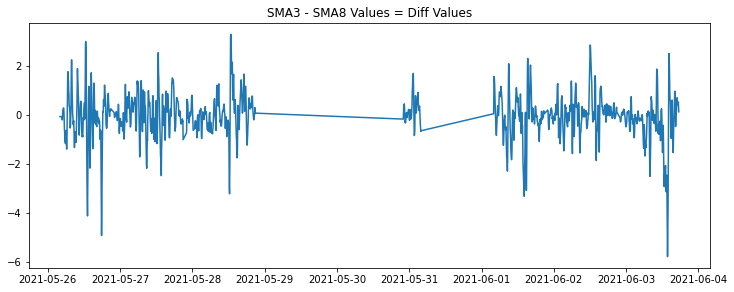

In [94]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Diff'], label  ='Diff Values')
plt.title('SMA3 - SMA8 Values = Diff Values')

In [95]:
df["Diff"]

Datetime
2021-05-26 00:00:00-04:00   -0.079132
2021-05-26 00:05:00-04:00   -0.079132
2021-05-26 00:10:00-04:00   -0.079132
2021-05-26 00:15:00-04:00   -0.079132
2021-05-26 00:20:00-04:00   -0.079132
                               ...   
2021-06-03 13:10:00-04:00    0.420853
2021-06-03 13:15:00-04:00    0.400019
2021-06-03 13:20:00-04:00    0.516678
2021-06-03 13:25:00-04:00    0.308339
2021-06-03 13:28:43-04:00    0.116664
Name: Diff, Length: 1524, dtype: float64

In [96]:
# Using a for loop to compare 3sma with 8sma and generating a signal.
postition =0
#position = int
for i in range(len(df)):
    if  -1 > df["Diff"][i] < 1:  # The value should be considered with ATR (7) Inicator.
        #print(" Buy Signal")
        print("Buy Entry Price", df["Close"][i])
        print("Entry Time:  ", datetime.datetime.now())
        print("Target", df["Close"][i] +1.8 ) # Risk Reward Ratio 1:2, Take profit = 4 X ATR for 5 minute timeframe
        print("Stoploss", df["Close"][i]-0.90) # Risk Reward Ratio 1:2, Stop loss = 2 X ATR for 5 minute timeframe
        
        print("**********************")
        #print("Datetime", df["Datetime"])
    else:
        #print('Sell signal')
        print("Sell Entry Price", df["Close"][i])
        print("Entry Time:  ", datetime.datetime.now())
        print("Target", df["Close"][i] -1.8) # Risk Reward Ratio 1:2, Take profit = 4 X ATR for 5 minute timeframe
        print("Stoploss", df["Close"][i] + 0.90) # Risk Reward Ratio 1:2, Stop loss = 2 X ATR for 5 minute timeframe
        print("**********************")
       

Sell Entry Price 1907.0999755859375
Entry Time:   2021-06-03 23:08:51.248347
Target 1905.2999755859375
Stoploss 1907.9999755859376
**********************
Sell Entry Price 1906.699951171875
Entry Time:   2021-06-03 23:08:51.249311
Target 1904.899951171875
Stoploss 1907.599951171875
**********************
Sell Entry Price 1906.5999755859375
Entry Time:   2021-06-03 23:08:51.250309
Target 1904.7999755859375
Stoploss 1907.4999755859376
**********************
Sell Entry Price 1907.4000244140625
Entry Time:   2021-06-03 23:08:51.251306
Target 1905.6000244140625
Stoploss 1908.3000244140626
**********************
Sell Entry Price 1907.0
Entry Time:   2021-06-03 23:08:51.251306
Target 1905.2
Stoploss 1907.9
**********************
Sell Entry Price 1906.9000244140625
Entry Time:   2021-06-03 23:08:51.251306
Target 1905.1000244140625
Stoploss 1907.8000244140626
**********************
Sell Entry Price 1906.800048828125
Entry Time:   2021-06-03 23:08:51.251306
Target 1905.000048828125
Stoploss 1907.

Sell Entry Price 1895.5
Entry Time:   2021-06-03 23:08:51.435752
Target 1893.7
Stoploss 1896.4
**********************
Sell Entry Price 1894.800048828125
Entry Time:   2021-06-03 23:08:51.435752
Target 1893.000048828125
Stoploss 1895.700048828125
**********************
Sell Entry Price 1894.699951171875
Entry Time:   2021-06-03 23:08:51.435752
Target 1892.899951171875
Stoploss 1895.599951171875
**********************
Sell Entry Price 1895.0
Entry Time:   2021-06-03 23:08:51.435752
Target 1893.2
Stoploss 1895.9
**********************
Sell Entry Price 1894.300048828125
Entry Time:   2021-06-03 23:08:51.436751
Target 1892.500048828125
Stoploss 1895.200048828125
**********************
Sell Entry Price 1893.9000244140625
Entry Time:   2021-06-03 23:08:51.436751
Target 1892.1000244140625
Stoploss 1894.8000244140626
**********************
Sell Entry Price 1893.5999755859375
Entry Time:   2021-06-03 23:08:51.436751
Target 1891.7999755859375
Stoploss 1894.4999755859376
**********************
Sel

Target 1897.7999755859375
Stoploss 1900.4999755859376
**********************
Sell Entry Price 1898.800048828125
Entry Time:   2021-06-03 23:08:51.622256
Target 1897.000048828125
Stoploss 1899.700048828125
**********************
Sell Entry Price 1899.5999755859375
Entry Time:   2021-06-03 23:08:51.622256
Target 1897.7999755859375
Stoploss 1900.4999755859376
**********************
Sell Entry Price 1898.300048828125
Entry Time:   2021-06-03 23:08:51.623252
Target 1896.500048828125
Stoploss 1899.200048828125
**********************
Sell Entry Price 1900.0999755859375
Entry Time:   2021-06-03 23:08:51.624250
Target 1898.2999755859375
Stoploss 1900.9999755859376
**********************
Sell Entry Price 1900.0999755859375
Entry Time:   2021-06-03 23:08:51.624250
Target 1898.2999755859375
Stoploss 1900.9999755859376
**********************
Sell Entry Price 1898.5999755859375
Entry Time:   2021-06-03 23:08:51.624250
Target 1896.7999755859375
Stoploss 1899.4999755859376
**********************
Sell 

Stoploss 1893.099951171875
**********************
Sell Entry Price 1893.0
Entry Time:   2021-06-03 23:08:51.809753
Target 1891.2
Stoploss 1893.9
**********************
Sell Entry Price 1891.800048828125
Entry Time:   2021-06-03 23:08:51.809753
Target 1890.000048828125
Stoploss 1892.700048828125
**********************
Sell Entry Price 1891.699951171875
Entry Time:   2021-06-03 23:08:51.809753
Target 1889.899951171875
Stoploss 1892.599951171875
**********************
Sell Entry Price 1891.699951171875
Entry Time:   2021-06-03 23:08:51.810750
Target 1889.899951171875
Stoploss 1892.599951171875
**********************
Sell Entry Price 1891.4000244140625
Entry Time:   2021-06-03 23:08:51.810750
Target 1889.6000244140625
Stoploss 1892.3000244140626
**********************
Sell Entry Price 1891.199951171875
Entry Time:   2021-06-03 23:08:51.810750
Target 1889.399951171875
Stoploss 1892.099951171875
**********************
Sell Entry Price 1892.300048828125
Entry Time:   2021-06-03 23:08:51.81075

Entry Time:   2021-06-03 23:08:51.963344
Target 1905.2999755859375
Stoploss 1907.9999755859376
**********************
Sell Entry Price 1906.800048828125
Entry Time:   2021-06-03 23:08:52.026173
Target 1905.000048828125
Stoploss 1907.700048828125
**********************
Sell Entry Price 1906.4000244140625
Entry Time:   2021-06-03 23:08:52.026173
Target 1904.6000244140625
Stoploss 1907.3000244140626
**********************
Sell Entry Price 1906.800048828125
Entry Time:   2021-06-03 23:08:52.027172
Target 1905.000048828125
Stoploss 1907.700048828125
**********************
Sell Entry Price 1906.699951171875
Entry Time:   2021-06-03 23:08:52.027172
Target 1904.899951171875
Stoploss 1907.599951171875
**********************
Sell Entry Price 1906.800048828125
Entry Time:   2021-06-03 23:08:52.028168
Target 1905.000048828125
Stoploss 1907.700048828125
**********************
Sell Entry Price 1906.9000244140625
Entry Time:   2021-06-03 23:08:52.028168
Target 1905.1000244140625
Stoploss 1907.8000244

Target 1903.500048828125
Stoploss 1906.200048828125
**********************
Sell Entry Price 1905.4000244140625
Entry Time:   2021-06-03 23:08:52.217937
Target 1903.6000244140625
Stoploss 1906.3000244140626
**********************
Sell Entry Price 1905.4000244140625
Entry Time:   2021-06-03 23:08:52.218935
Target 1903.6000244140625
Stoploss 1906.3000244140626
**********************
Sell Entry Price 1905.5999755859375
Entry Time:   2021-06-03 23:08:52.219932
Target 1903.7999755859375
Stoploss 1906.4999755859376
**********************
Sell Entry Price 1905.199951171875
Entry Time:   2021-06-03 23:08:52.219932
Target 1903.399951171875
Stoploss 1906.099951171875
**********************
Sell Entry Price 1905.0
Entry Time:   2021-06-03 23:08:52.220930
Target 1903.2
Stoploss 1905.9
**********************
Sell Entry Price 1905.300048828125
Entry Time:   2021-06-03 23:08:52.220930
Target 1903.500048828125
Stoploss 1906.200048828125
**********************
Sell Entry Price 1905.4000244140625
Entry T

Entry Time:   2021-06-03 23:08:52.400027
Target 1906.2999755859375
Stoploss 1908.9999755859376
**********************
Sell Entry Price 1907.300048828125
Entry Time:   2021-06-03 23:08:52.415650
Target 1905.500048828125
Stoploss 1908.200048828125
**********************
Sell Entry Price 1907.0
Entry Time:   2021-06-03 23:08:52.415650
Target 1905.2
Stoploss 1907.9
**********************
Sell Entry Price 1907.199951171875
Entry Time:   2021-06-03 23:08:52.415650
Target 1905.399951171875
Stoploss 1908.099951171875
**********************
Sell Entry Price 1908.0
Entry Time:   2021-06-03 23:08:52.415650
Target 1906.2
Stoploss 1908.9
**********************
Sell Entry Price 1907.300048828125
Entry Time:   2021-06-03 23:08:52.415650
Target 1905.500048828125
Stoploss 1908.200048828125
**********************
Sell Entry Price 1907.300048828125
Entry Time:   2021-06-03 23:08:52.415650
Target 1905.500048828125
Stoploss 1908.200048828125
**********************
Sell Entry Price 1907.699951171875
Entry T

Entry Time:   2021-06-03 23:08:52.595649
Target 1905.2999755859375
Stoploss 1907.9999755859376
**********************
Sell Entry Price 1907.0
Entry Time:   2021-06-03 23:08:52.596646
Target 1905.2
Stoploss 1907.9
**********************
Sell Entry Price 1906.9000244140625
Entry Time:   2021-06-03 23:08:52.596646
Target 1905.1000244140625
Stoploss 1907.8000244140626
**********************
Sell Entry Price 1907.0
Entry Time:   2021-06-03 23:08:52.597644
Target 1905.2
Stoploss 1907.9
**********************
Sell Entry Price 1906.800048828125
Entry Time:   2021-06-03 23:08:52.598643
Target 1905.000048828125
Stoploss 1907.700048828125
**********************
Sell Entry Price 1906.800048828125
Entry Time:   2021-06-03 23:08:52.598643
Target 1905.000048828125
Stoploss 1907.700048828125
**********************
Sell Entry Price 1906.699951171875
Entry Time:   2021-06-03 23:08:52.598643
Target 1904.899951171875
Stoploss 1907.599951171875
**********************
Sell Entry Price 1906.5
Entry Time:   2

In [97]:
#**************************************************************************************************************************#